In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
#Nonstationary bandit
class NonStationaryBandit:
    def __init__(self):
        #all starts equal
        self.true_values = np.zeros(10)

    
    def random_walk(self):       
        self.true_values += np.random.randn(10)*0.01
    
    def get_reward(self,action):
        return self.true_values[action] + np.random.randn()

In [3]:
#E-greedy agent class with constant alpha
class EpsilonGreedyAlphaAgent:
    def __init__(self, epsilon, alpha=0.1):
        self.epsilon = epsilon
        self.alpha = alpha
        self.Q = np.zeros(10)  #estimated action values all starts at 0

    def select_action(self):
        #exploration part
        if np.random.rand() < self.epsilon:
            return np.random.randint(10)
        #exploitation part
        else:
            return np.argmax(self.Q)

    def update(self, action, reward):
        self.Q[action] = self.Q[action] + self.alpha*(reward-self.Q[action])

In [4]:
def run_testbed_nonstationary(num_problems=200, num_steps=100, epsilon=0.1):
    #creating array to store sum of rewards at each time step.
    total_rewards = np.zeros(num_steps)

    for problem in range(num_problems):
        #print progress after every 200 problems
        if (problem+1)%200 == 0:
            print(f"{problem+1} problems completed out of {num_problems}")

        #create a new bandit problem
        bandit = NonStationaryBandit()

        #create a new agent that knows nothing initially
        agent = EpsilonGreedyAlphaAgent(epsilon=epsilon)

        #run this problem num_steps times
        for step in range(num_steps):

            #non-stationary expected result
            bandit.random_walk()
            
            #agent selects an action using e-greedy method
            action = agent.select_action()

            #bandit gives the reward for that action
            reward = bandit.get_reward(action)
            
            #agent updates it's estimates based on the reward
            agent.update(action, reward)

            #recording this reward
            total_rewards[step] += reward
            
    total_rewards /= num_problems
    return total_rewards 

In [5]:
if __name__ == "__main__":
    eps_values = np.arange(0,0.2,0.01)
    performance = []
    for eps in eps_values:
        rewards = run_testbed_nonstationary(num_problems=2000, num_steps=100000, epsilon=eps)
        avg_reward = rewards[:50000].mean()
        print(f"{avg_reward} is the average reward for epsilon = {eps}")
        performance.append(avg_reward)

200 problems completed out of 2000
400 problems completed out of 2000
600 problems completed out of 2000
800 problems completed out of 2000
1000 problems completed out of 2000
1200 problems completed out of 2000
1400 problems completed out of 2000
1600 problems completed out of 2000
1800 problems completed out of 2000
2000 problems completed out of 2000
1.7616001854195202 is the average reward for epsilon = 0.0
200 problems completed out of 2000
400 problems completed out of 2000
600 problems completed out of 2000
800 problems completed out of 2000
1000 problems completed out of 2000
1200 problems completed out of 2000
1400 problems completed out of 2000
1600 problems completed out of 2000
1800 problems completed out of 2000
2000 problems completed out of 2000
2.1792535467524585 is the average reward for epsilon = 0.01
200 problems completed out of 2000
400 problems completed out of 2000
600 problems completed out of 2000
800 problems completed out of 2000
1000 problems completed out o

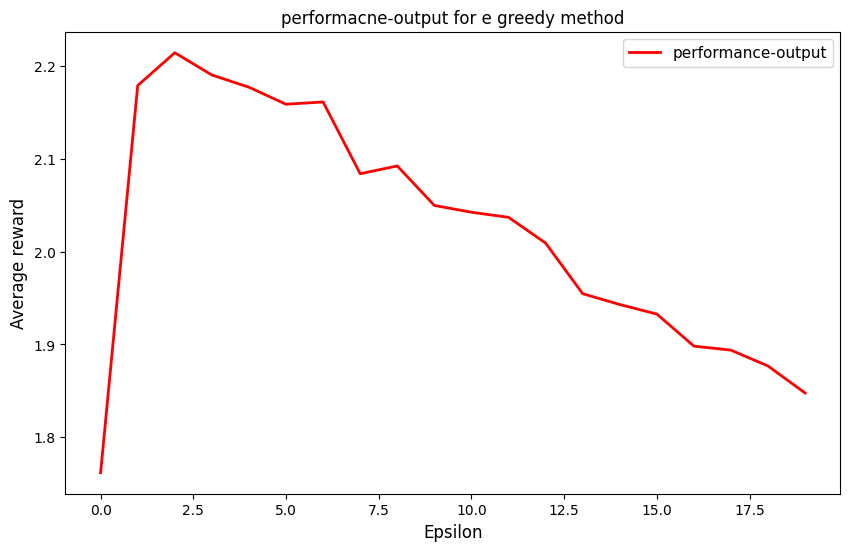

In [6]:
plt.figure(figsize=(10,6))
plt.plot(performance, linewidth=2, label='performance-output', color='red')
plt.xlabel('Epsilon', fontsize=12)
plt.ylabel('Average reward', fontsize=12)
plt.title('performacne-output for e greedy method')
plt.legend(fontsize=11)